# STAT 345: Nonparametric Statistics

## Lesson 06.2: Measures of Correlation

**Reading: Conover Section 5.4**

*Prof. John T. Whelan*

Tuesday 4 March 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

So far, considered inferential problems using
- independent samples $\{x_i|i=1,\ldots,n\}$ and $\{y_j|j=1,\ldots,m\}$ (Wilcoxon-Mann-Whitney rank sum test, Conover squared ranks test + Kruskal-Wallis test for $k$ samples)
- and paired data $\{(x_i,y_i)|i=1,\ldots,m\}$ (the sign test, Wilcoxon signed-rank test).

- So far, our paired data analysis concerned difference of location parameters, so paired data immediately converted to differences $d_i=y_i-x_i$. In fact, the paired methods considered so far can be applied to a single sample $\{x_i\}$ in place of the set of differences $\{d_i\}$.

-  Now consider a question that uses the full set of data $\{(x_i.y_i)\}$ rather than just the differences $y_i-x_i$: how correlated are the data?

- We're interested in the correlation of the paired populations or bivariate distribution $f(x,y)$ from which the
paired sample is drawn; use the sample $\{(x_i,y_i)\}$ to address it.

- Qualitatively, is ${\color{royalblue}{Y}}$ generally large when ${\color{royalblue}{X}}$ is large &
${\color{royalblue}{Y}}$ small when ${\color{royalblue}{X}}$ is small, or vice versa?

- Recall: rvs have means $\mu_X=E({\color{royalblue}{X}})$ & $\mu_Y=E({\color{royalblue}{Y}})$ and variances
$\sigma_X^2=\operatorname{Var}({\color{royalblue}{X}})=E([{\color{royalblue}{X}}-\mu_X]^2)=E([{\color{royalblue}{X}}]^2)-\mu_X^2$
&
$\sigma_Y^2=\operatorname{Var}({\color{royalblue}{Y}})=E([{\color{royalblue}{Y}}-\mu_Y]^2)=E([{\color{royalblue}{Y}}]^2)-\mu_Y^2$
- Covariance is $\operatorname{Cov}({\color{royalblue}{X}},{\color{royalblue}{Y}}) = E([{\color{royalblue}{X}}-\mu_X][{\color{royalblue}{Y}}-\mu_Y]) =
E({\color{royalblue}{X}}{\color{royalblue}{Y}})-\mu_X\mu_Y$ and correlation is
$$\operatorname{Corr}({\color{royalblue}{X}},{\color{royalblue}{Y}}) = \frac{\operatorname{Cov}({\color{royalblue}{X}},{\color{royalblue}{Y}})}{\sigma_X\sigma_Y}$$

- If rvs ${\color{royalblue}{X}}$ &
${\color{royalblue}{Y}}$ are independent (joint distribution is $f(x,y)=f_X(x)f_Y(y)$), then $\operatorname{Cov}({\color{royalblue}{X}},{\color{royalblue}{Y}})=0$, but uncorrelated does **not** imply independent

- It's not hard to show that
$-1\le\operatorname{Corr}({\color{royalblue}{X}},{\color{royalblue}{Y}})\le 1$.

## Pearson’s $r$

$$\operatorname{Corr}({\color{royalblue}{X}},{\color{royalblue}{Y}}) = \frac{E([{\color{royalblue}{X}}-\mu_X][{\color{royalblue}{Y}}-\mu_Y])}{\sqrt{E([{\color{royalblue}{X}}-\mu_X]^2)E([{\color{royalblue}{Y}}-\mu_Y]^2)}}$$

The standard parametric estimate of the correlation is to divide the
sample covariance
$$s_{xy} = \frac{1}{n-1}\sum_{i=1}^n (x_i-{{\overline{x}}})(y_i-{{\overline{y}}})$$
by the product of the sample standard deviations $s_x$ and $s_y$; the
ratio
$$r = \frac{s_{xy}}{s_xs_y} = \frac{\sum_{i=1}^n (x_i-{{\overline{x}}})(y_i-{{\overline{y}}})}
  {\sqrt{\sum_{i=1}^n (x_i-{{\overline{x}}})^2}\sqrt{\sum_{i=1}^n (y_i-{{\overline{y}}})^2}}$$
is known as Pearson’s correlation <span><span>coëfficient</span></span>
or “Pearson’s $r$”. Not too hard to see that $-1\le r\le 1$ as
well.

We can compute the correlation <span><span>coëfficient</span></span> for
a paired data set like this:

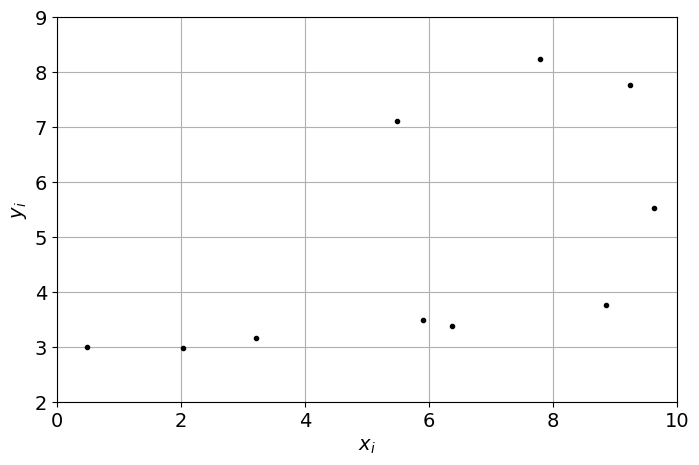

In [3]:
x_i = np.array([9.64, 5.91, 3.22, 2.04, 5.49, 9.24, 6.38, 7.79, 0.48, 8.86])
y_i = np.array([5.53, 3.48, 3.16, 2.98, 7.11, 7.75, 3.37, 8.24, 3.00, 3.75]);
plt.plot(x_i,y_i,'k.');plt.xlabel(r'$x_i$');plt.ylabel(r'$y_i$');plt.xlim(0,10);plt.ylim(2,9);plt.grid();

In [4]:
xbar = np.mean(x_i); ybar = np.mean(y_i); xbar, ybar

(5.904999999999999, 4.837)

In [5]:
r = np.sum((x_i-xbar)*(y_i-ybar))/np.sqrt(np.sum((x_i-xbar)**2)*np.sum((y_i-ybar)**2)); r

0.5901002196595794

Note that numpy and scipy actually have functions that calculate the
correlation coefficient directly:

In [6]:
np.corrcoef(x_i,y_i)

array([[1.        , 0.59010022],
       [0.59010022, 1.        ]])

In [7]:
stats.pearsonr(x_i,y_i)

PearsonRResult(statistic=0.5901002196595796, pvalue=0.07252406498789259)

## Spearman’s $\rho$

- Simple non-parametric measure of correlation: compute the correlation <span><span>coëfficient</span></span> of the ranks of the data, rather than of the data themselves.

- Rank within each data sample, i.e., ranks of the $\{x_i\}$ are $\{R^x_i\}$ & ranks of the $\{y_i\}$ are $\{R^y_i\}$.

- Conover calls these $R(X_i)$ and $R(Y_i)$, respectively, but it’s important to note they are
two different sets of ranks, each from $1$ to $n$, and *not* a single
ranking of the $\{x_i\}$ and the $\{y_i\}$ together.

In [8]:
Rx_i = stats.rankdata(x_i); x_i, Rx_i

(array([9.64, 5.91, 3.22, 2.04, 5.49, 9.24, 6.38, 7.79, 0.48, 8.86]),
 array([10.,  5.,  3.,  2.,  4.,  9.,  6.,  7.,  1.,  8.]))

In [9]:
Ry_i = stats.rankdata(y_i); y_i, Ry_i

(array([5.53, 3.48, 3.16, 2.98, 7.11, 7.75, 3.37, 8.24, 3.  , 3.75]),
 array([ 7.,  5.,  3.,  1.,  8.,  9.,  4., 10.,  2.,  6.]))

- Each set of ranks has the same mean (even if there are ties)
$${{\overline{R}}}= \frac{1}{n}\sum_{i=1}^n R^x_i = \frac{1}{n}\sum_{i=1}^n R^y_i
  = \frac{n+1}{2}$$

In [10]:
Rbar = np.mean(Rx_i); n=len(x_i); Rbar, np.mean(Ry_i), (n+1)/2

(5.5, 5.5, 5.5)

- Thus the rank correlation
<span><span>coëfficient</span></span>, known as Spearman’s $\rho$, is
$$\rho = \frac{\sum_{i=1}^n (R^x_i-{{\overline{R}}})(R^y_i-{{\overline{R}}})}
  {\sqrt{\sum_{i=1}^n (R^x_i-{{\overline{R}}})^2}\sqrt{\sum_{i=1}^n (R^y_i-{{\overline{R}}})^2}}$$

In [11]:
rho = np.sum((Rx_i-Rbar)*(Ry_i-Rbar) / np.sqrt(np.sum((Rx_i-Rbar)**2)*np.sum((Ry_i-Rbar)**2))); rho

0.7333333333333334

Note that if there are no ties, the sums in the denominator don’t depend
on the data, e.g., $$
  \sum_{i=1}^n (R^x_i-{{\overline{R}}})^2 = \sum_{i=1}^n (R^x_i)^2
  - 2{{\overline{R}}}\sum_{i=1}^n R^x_i + n{{\overline{R}}}^2
  = \sum_{r=1}^n r^2 - n{{\overline{R}}}^2
  = \frac{n(n+1)(n-1)}{12}
  = \sum_{i=1}^n (R^y_i-{{\overline{R}}})^2$$

In [12]:
np.sum((Rx_i-Rbar)**2), np.sum((Ry_i-Rbar)**2), n*(n+1)*(n-1)/12

(82.5, 82.5, 82.5)

Note that we
can also simplify the numerator by noting $$\begin{aligned}
  \sum_{i=1}^n (R^x_i-R^y_i)^2  &= \sum_{i=1}^n ([R^x_i-{{\overline{R}}}]-[R^y_i-{{\overline{R}}}])^2
  \\
  &= \sum_{i=1}^n (R^x_i-{{\overline{R}}})^2 + \sum_{i=1}^n (R^y_i-{{\overline{R}}})^2
  - 2\sum_{i=1}^n (R^x_i-{{\overline{R}}})(R^y_i-{{\overline{R}}})\end{aligned}$$
so, if there are no ties,
$$\rho = 1 - \frac{6}{n(n^2-1)}\sum_{i=1}^n (R^x_i-R^y_i)^2
  \qquad \hbox{(no ties)}$$

In [13]:
1-(6/(n*(n**2-1)))*np.sum((Rx_i-Ry_i)**2), rho

(0.7333333333333334, 0.7333333333333334)

Spearman’s $\rho$ is the correlation
<span><span>coëfficient</span></span> calculated on the ranks of the
data; we can plot the ranks of the same data set as before:

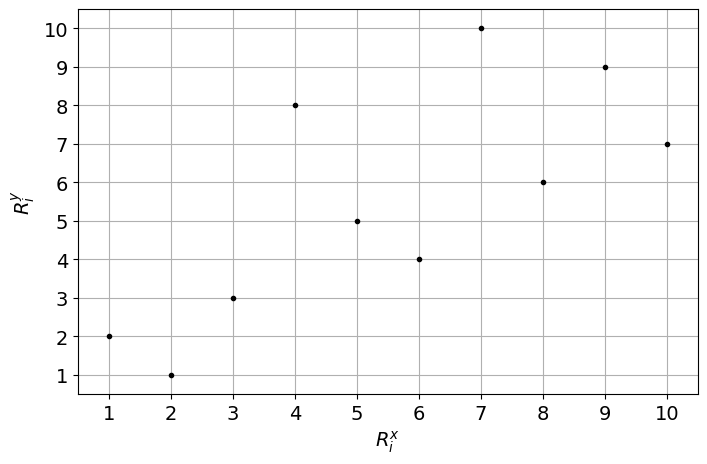

In [14]:
plt.plot(Rx_i,Ry_i,'k.');plt.xlim([0.5,n+0.5]);plt.ylim([0.5,n+0.5]);plt.xticks(1+np.arange(n));plt.yticks(1+np.arange(n));
plt.xlabel(r'$R^x_i$');plt.ylabel(r'$R^y_i$');plt.grid();

And as before numpy and scipy let us calculate the rank correlation
coefficient (but note that the function is called `spearmanr()` and not
`spearmanrho()`.

In [15]:
np.corrcoef(Rx_i,Ry_i)

array([[1.        , 0.73333333],
       [0.73333333, 1.        ]])

In [16]:
stats.spearmanr(x_i,y_i)

SignificanceResult(statistic=0.7333333333333332, pvalue=0.01580059625057158)

- To perform a hypothesis test, we need the null distribution of $\rho$.

- If populations uncorrelated, than the point with
$R^x_i=1$ is equally likely to be paired with any of the $n$ $y$ ranks;
the point with $R^x_i=2$ is equally likely to be paired with any of the
$n-1$ other $y$ ranks, etc.

- There are $n!$ different permutations, In the case
of this data, there are $10!=3\,628\,800$.

In [17]:
from scipy.special import factorial
factorial(10)

3628800.0

It takes a few seconds, but python can loop through all of these
permutations and give us a null distribution that we can use to
calculate $p$-values.

In [18]:
import itertools; R_r = np.arange(1,n+1)
sumsq_I = np.array([np.sum((R_r-permR_r)**2) for permR_r in itertools.permutations(R_r)], dtype=int)
rho_I = 1. - 6./(n*(n**2-1.)) * sumsq_I
2.*np.mean(rho_I >= rho)

0.020233134920634922

For larger sample sizes, we’d like to use a normal approximation.
Clearly $E({\color{royalblue}{\rho}})=0$; it turns out that
$\operatorname{Var}({\color{royalblue}{\rho}})=\frac{1}{n-1}$, which we
can verify:

In [19]:
np.mean(rho_I),np.std(rho_I),1./np.sqrt(n-1)

(-1.0827317878249146e-16, 0.3333333333333333, 0.3333333333333333)

We can compare the exact two-tailed $p$-value above to the normal
approximation value:

In [20]:
2*stats.norm.sf(rho*np.sqrt(n-1)), 2.*np.mean(rho_I >= rho)

(0.02780689502699719, 0.020233134920634922)

It’s not a great approximation $2.8\%$ versus $2.0\%$, but it’s okay.

Note that both of these are different from the $1.6\%$ returned by
scipy, which comes from a different approximation, that
$$
{\color{royalblue}{\rho}}\sqrt{\frac{n-2}{1-{\color{royalblue}{\rho}}^2}}
$$
is Student-$t$ distributed with $n-2$ degrees of freedom:

In [21]:
stats.spearmanr(x_i,y_i)

SignificanceResult(statistic=0.7333333333333332, pvalue=0.01580059625057158)

In [22]:
2*stats.norm.sf(rho*np.sqrt(n-1)), 2.*np.mean(rho_I >= rho),2*stats.t(df=n-2).sf(np.abs(rho)*np.sqrt((n-2)/(1-rho**2)))

(0.02780689502699719, 0.020233134920634922, 0.015800596250571536)

In any event, we know that the disribution can’t quite be normal
because the probability for $\rho$ to be above $1$ or below $-1$ is
zero.

We can look at how normal things seem with a histogram:

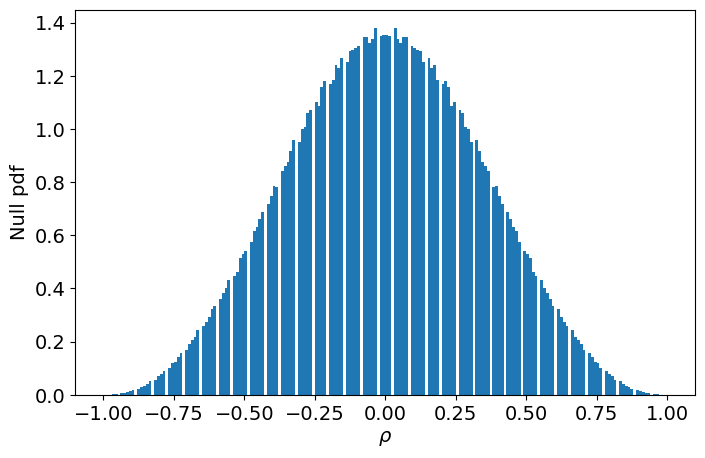

In [23]:
plt.hist(rho_I,bins=200,density=True); plt.xlabel(r'$\rho$'); plt.ylabel('Null pdf');

We see that there is also some discretization effect!

## Kendall’s $\tau$

A measure of correlation or association coming from a different starting
point is the so-called Kendall $\tau$. This is defined by considering
all of the $\binom{n}{2}=\frac{n(n-1)}{2}$ pairs of data points, and
counting how many of them are “concordant” and how many are
“discordant”. We say that:

-   $(x_i,y_i)$ and $(x_j,y_j)$ are **concordant** if $x_i>x_j$ and
    $y_i>y_j$, *or* $x_i<x_j$ and $y_i<y_j$

-   $(x_i,y_i)$ and $(x_j,y_j)$ are **disccordant** if $x_i>x_j$ and
    $y_i<y_j$, *or* $x_i<x_j$ and $y_i>y_j$

-   $(x_i,y_i)$ and $(x_j,y_j)$ are neither concordant or discordant if
    $x_i=x_j$ or $y_i=y_j$.

The ideas of concordant/discordant pairs are easy to grasp if we
visualize them on a scatter plot of the data.

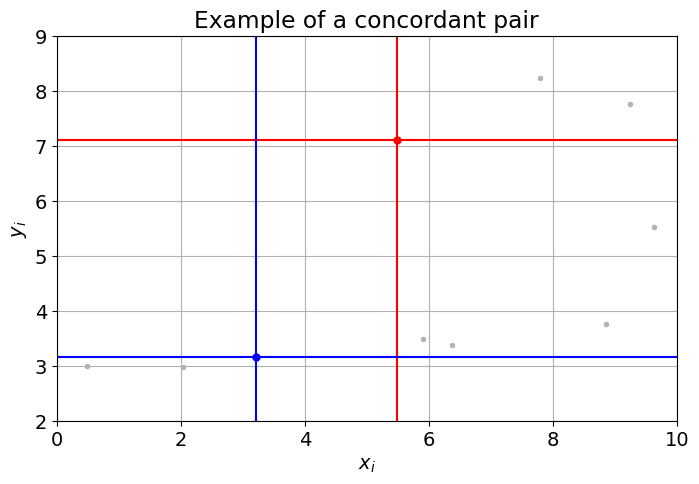

In [24]:
gray = [0.7,0.7,0.7]; plt.plot(x_i,y_i,'k.',mfc=gray,mec=gray);x1 = x_i[4]; y1 = y_i[4]; x2 = x_i[2]; y2 = y_i[2]
plt.plot([x1,x1],[2,9],'r-');plt.plot([0,10],[y1,y1],'r-');plt.plot(x1,y1,'r.',ms=10);plt.plot([x2,x2],[2,9],'b-');
plt.plot([0,10],[y2,y2],'b-');plt.plot(x2,y2,'b.',ms=10);plt.title('Example of a concordant pair');
plt.xlabel(r'$x_i$');plt.ylabel(r'$y_i$');plt.xlim(0,10);plt.ylim(2,9);plt.grid();

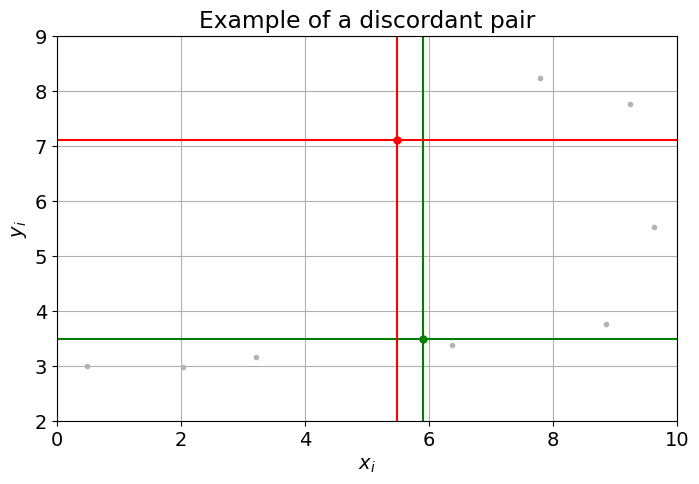

In [25]:
plt.plot(x_i,y_i,'k.',mfc=gray,mec=gray);x1 = x_i[4]; y1 = y_i[4]; x2 = x_i[1]; y2 = y_i[1]
plt.plot(x1,y1,'r.',ms=10);plt.plot([x2,x2],[2,9],'g-');plt.plot([0,10],[y2,y2],'g-');
plt.plot(x2,y2,'g.',ms=10);plt.xlabel(r'$x_i$');plt.ylabel(r'$y_i$');plt.plot([x1,x1],[2,9],'r-');
plt.plot([0,10],[y1,y1],'r-');plt.xlabel(r'$x_i$');plt.ylabel(r'$y_i$');plt.xlim([0,10]);
plt.ylim([2,9]);plt.grid(True);plt.title('Example of a discordant pair');

Although the classification into concordant and discordant pairs is not
explicitly written in terms of the ranks, we can see that, since only
depends on the ordering of the $\{x_i\}$ and the ordering of the
$\{y_i\}$, it can be determined from the ranks alone:

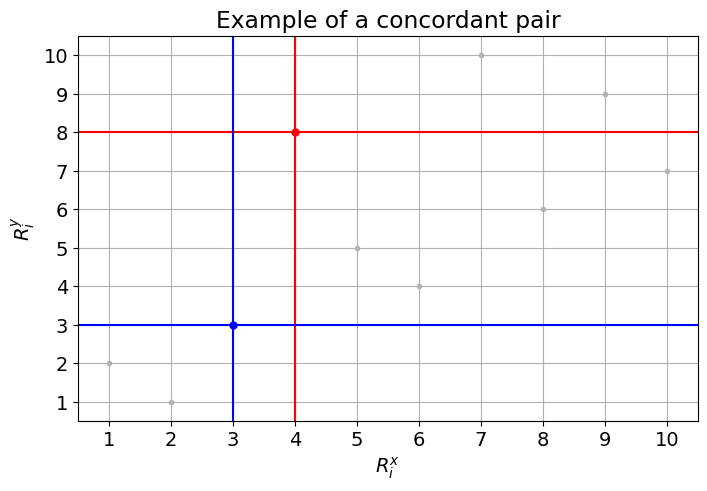

In [26]:
plt.plot(Rx_i,Ry_i,'k.',mfc=gray,mec=gray);Rx1 = Rx_i[4]; Ry1 = Ry_i[4]; Rx2 = Rx_i[2]; Ry2 = Ry_i[2]
plt.plot([Rx1,Rx1],[0.5,n+0.5],'r-');plt.plot([0.5,n+0.5],[Ry1,Ry1],'r-');plt.plot(Rx1,Ry1,'r.',ms=10);
plt.plot([Rx2,Rx2],[0.5,n+0.5],'b-');plt.plot([0.5,n+0.5],[Ry2,Ry2],'b-');plt.plot(Rx2,Ry2,'b.',ms=10);plt.xlim([0.5,n+0.5]);
plt.ylim([0.5,n+0.5]);plt.xticks(1+np.arange(n));plt.yticks(1+np.arange(n));plt.xlabel(r'$R^x_i$');plt.ylabel(r'$R^y_i$');
plt.title('Example of a concordant pair');plt.grid();

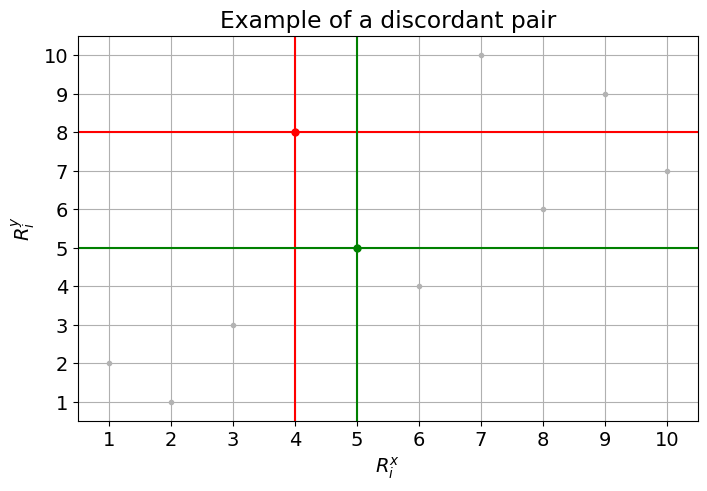

In [27]:
plt.plot(Rx_i,Ry_i,'k.',mfc=gray,mec=gray);Rx1 = Rx_i[4]; Ry1 = Ry_i[4]; Rx2 = Rx_i[1]; Ry2 = Ry_i[1]
plt.plot([Rx1,Rx1],[0.5,n+0.5],'r-');plt.plot([0.5,n+0.5],[Ry1,Ry1],'r-');plt.plot(Rx1,Ry1,'r.',ms=10);
plt.plot([Rx2,Rx2],[0.5,n+0.5],'g-');plt.plot([0.5,n+0.5],[Ry2,Ry2],'g-');plt.plot(Rx2,Ry2,'g.',ms=10);plt.xlim([0.5,n+0.5]);
plt.ylim([0.5,n+0.5]);plt.xticks(1+np.arange(n));plt.yticks(1+np.arange(n));plt.xlabel(r'$R^x_i$');plt.ylabel(r'$R^y_i$');
plt.title('Example of a discordant pair');plt.grid(True);

The statistic is constructed from $N_c$,
the number of concordant pairs, and $N_d$, the number of discordant
pairs. If there are no ties, $$N_c+N_d = \frac{n(n-1)}{2}$$ and we can
define the Kendall tau statistic
$$\tau = \frac{N_c-N_d}{N_c+N_d} = \frac{2(N_c-N_d)}{n(n-1)}
  \qquad \hbox{no ties}$$ where the denominator was chosen so that
$-1\le\tau\le 1$.

There are actually a few different prescriptions to handle ties. Conover
advocates considering any pair with $x_i\ne x_j$ and $y_i=y_j$ to be
half-concordant and half-discordant, and thus contribute $\frac{1}{2}$
to $N_c$ and $\frac{1}{2}$ to $N_d$. This won’t change the numerator of
$\tau$, since these contributions cancel out of $N_c-N_d$, but it will
change the denominator.

To compute $\tau$, need to count the number of concordant and discordant pairs.  How could we identify them automatically? Consider the
first two points:

In [28]:
x_i[:2],y_i[:2]

(array([9.64, 5.91]), array([5.53, 3.48]))

In [29]:
(x_i[0]>x_i[1]),(y_i[0]>y_i[1])

(True, True)

We see that $x_1>x_2$ and $y_1>y_2$, so this is a concordant pair.  Can define a function that returns `True` iff $x_1>x_2$ and $y_1>y_2$, using the `&` (bitwise and) and `|` (bitwise or) operators to combine comparisons:

In [30]:
def is_concordant(pt1,pt2):
    return ((pt1[0]>pt2[0])&(pt1[1]>pt2[1])|(pt1[0]<pt2[0])&(pt1[1]<pt2[1]))
is_concordant((x_i[0],y_i[0]),(x_i[1],y_i[1]))

True

In [31]:
def is_discordant(pt1,pt2):
    return ((pt1[0]>pt2[0])&(pt1[1]<pt2[1])|(pt1[0]<pt2[0])&(pt1[1]>pt2[1]))
is_discordant((x_i[0],y_i[0]),(x_i[1],y_i[1]))

False

You can test out the behavior yourself by changing the values in this cell:

In [32]:
pt1 = (2,3); pt2 = (3,4); print(is_concordant(pt1,pt2),is_discordant(pt1,pt2))

True False


Loop through all pairs of points, sum # of concordant and discordant pairs, and find $N_c=35$ and $N_d=10$:

In [33]:
Nc = np.sum([is_concordant((x_i[i],y_i[i]),(x_i[j],y_i[j])) for (i,j) in itertools.combinations(range(n),2)]); Nc

35

In [34]:
Nd = np.sum([is_discordant((x_i[i],y_i[i]),(x_i[j],y_i[j])) for (i,j) in itertools.combinations(range(n),2)]); Nd

10

As noted above, it doesn't matter if we use the actual values or the ranks to do this computation:

In [35]:
print(np.sum([is_concordant((Rx_i[i],Ry_i[i]),(Rx_i[j],Ry_i[j])) for (i,j) in itertools.combinations(range(n),2)]),
      np.sum([is_discordant((Rx_i[i],Ry_i[i]),(Rx_i[j],Ry_i[j])) for (i,j) in itertools.combinations(range(n),2)]))

35 10


Note that, since there are no ties, $N_c+N_d=\frac{n(n-1)}{2}$

In [36]:
print("There are %d concordant and %d discordant pairs out of %d total"%(Nc,Nd,n*(n-1)//2))

There are 35 concordant and 10 discordant pairs out of 45 total


From these, we compute $\tau=\frac{35-10}{45}=\frac{5}{9}$:

In [37]:
tau = (Nc-Nd)/(Nc+Nd); tau

0.5555555555555556

And of course there’s a scipy function which does it for us and
estimates a two-sided $p$-value of $2.86\%$ (although older versions reported $2.53\%$):

In [38]:
stats.kendalltau(x_i,y_i) 

SignificanceResult(statistic=0.5555555555555555, pvalue=0.02860945767195767)

Again, to get the null distribution, we assume any of the $10!$ rank
pairings is equally likely.  An obvioius straightforward way to do this would be something like this:

In [39]:
# Nc_I = np.array([np.sum([is_concordant((i,perm_i[i]),(j,perm_i[j])) for (i,j) in itertools.combinations(range(n),2)]) 
#                  for perm_i in itertools.permutations(np.arange(n))])

Unfortunately, calling the `is_concordant()` function for each permutation makes the computation time unbearable (3 minutes on my new laptop), so we use a trick to speed this up, with
logical “exclusive or”, which is true if exactly one of the two
statements is true, but false if they are both true or both false.

In [40]:
True^True, True^False, False^True, False^False

(False, True, True, False)

In [43]:
not(True^True), not(True^False), not(False^True), not(False^False)

(True, False, False, True)

So we
want “NOT ($x_i>x_j$ XOR $y_i>y_j$)” for concordant and “NOT ($x_i>x_j$
XOR $y_i<y_j$)” for discordant.

In [42]:
pt1 = (x_i[0],y_i[0]); pt2 = (x_i[1],y_i[1]); print(is_concordant(pt1,pt2),is_discordant(pt1,pt2))
print(not((pt1[0]>pt2[0])^(pt1[1]>pt2[1])),not((pt1[0]>pt2[0])^(pt1[1]<pt2[1])))

True False
True False


Note that this only works because there are no ties:

In [43]:
pt1 = (2,3); pt2 = (2,4); print(is_concordant(pt1,pt2),is_discordant(pt1,pt2))
print(not((pt1[0]>pt2[0])^(pt1[1]>pt2[1])),not((pt1[0]>pt2[0])^(pt1[1]<pt2[1])))

False False
True False


In [44]:
idx_i = [i for i in range(n)]
import time; t1=time.time()
Nc_I = np.array([np.sum([not((i>j)^(perm_i[i]>perm_i[j])) for (i,j) in itertools.combinations(idx_i,2)])
                 for perm_i in itertools.permutations(idx_i)])
t2=time.time()
print('Computation took %g seconds' % (t2-t1))

Computation took 49.4321 seconds


Since there are no ties, we know every pair is either discordant or concordant:

In [45]:
Npairs = n*(n-1)//2; Npairs

45

In [46]:
Nd_I = Npairs - Nc_I
tau_I = (Nc_I-Nd_I)/Npairs
min(tau_I),max(tau_I)

(-1.0, 1.0)

We can plot a histogram of the exact distribution:

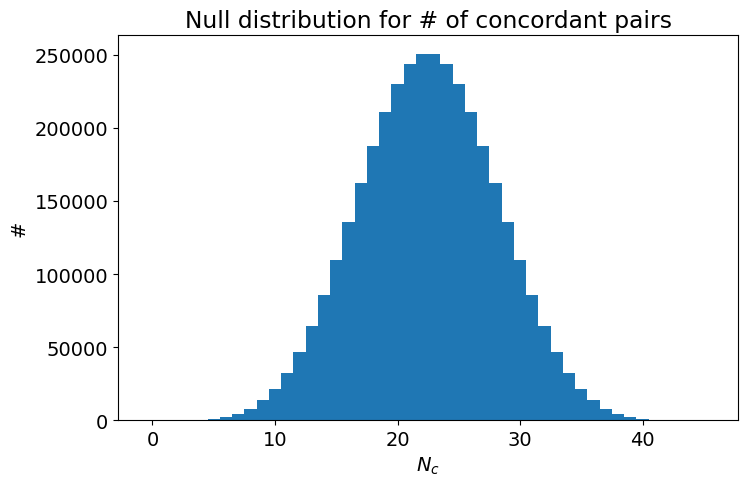

In [47]:
plt.hist(Nc_I,bins=np.arange(-0.5,Npairs+1));
plt.xlabel(r'$N_c$');plt.ylabel('#');plt.title('Null distribution for # of concordant pairs');

and from this we get the null distribution of $\tau$ statistic:

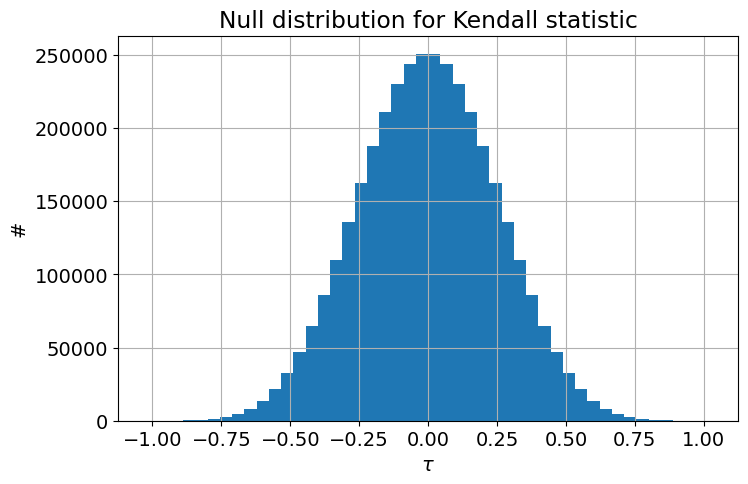

In [48]:
plt.hist(tau_I,bins=2*np.arange(-0.5,Npairs+1)/Npairs-1);
plt.xlabel(r'$\tau$');plt.ylabel('#');plt.title('Null distribution for Kendall statistic');plt.grid();

It should be apparent that the null distribution has
$E({\color{royalblue}{\tau}})=0$. The variance can be computed
theoretically to be
$\operatorname{Var}({\color{royalblue}{\tau}})=\frac{2(2n+5)}{9n(n-1)}$,
which we can verify for $n=10$:

In [49]:
np.mean(tau_I)

3.0577147711722124e-17

In [50]:
np.var(tau_I), 2*(2*n+5)/(9*n*(n-1))

(0.06172839506172841, 0.06172839506172839)

In [51]:
sigtau = np.sqrt(2*(2*n+5)/(9*n*(n-1))); sigtau

0.24845199749997662

Now we can compare the exact $p$-value with the value from the normal
distribution:

In [52]:
2*np.mean(Nc_I>=Nc), 2*np.mean(tau_I>=tau), 2*stats.norm.sf(tau/sigtau)

(0.02860945767195767, 0.02860945767195767, 0.025347318677468252)

Note that `stats.kendalltau()` can now compute either the exact or the approximate $p$-value:

In [53]:
stats.kendalltau(x_i,y_i,method='exact')

SignificanceResult(statistic=0.5555555555555555, pvalue=0.02860945767195767)

In [54]:
stats.kendalltau(x_i,y_i,method='asymptotic')

SignificanceResult(statistic=0.5555555555555555, pvalue=0.025347318677468252)

In [55]:
stats.kendalltau(x_i,y_i) # default behavior depends on the sample size

SignificanceResult(statistic=0.5555555555555555, pvalue=0.02860945767195767)